In [1]:
import sim_analysis as plume_analysis
import sim_analysis
import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

import scipy as sp
import config
# print(config.dataset.keys())

from plume_env_dynamic import DynamicPlume
import glob
glob.glob(f"{config.datadir}/*snapshot.csv")
# config.datadir

['/home/satsingh/plume/plumedata/noisy6x5b5_5652_snapshot.csv',
 '/home/satsingh/plume/plumedata/noisy3x5b5_4124_snapshot.csv',
 '/home/satsingh/plume/plumedata/noisy3x5b5_3808_snapshot.csv',
 '/home/satsingh/plume/plumedata/noisy3x5b5_3368_snapshot.csv',
 '/home/satsingh/plume/plumedata/constantx5b5_5844_snapshot.csv',
 '/home/satsingh/plume/plumedata/constantx5b5_3140_snapshot.csv',
 '/home/satsingh/plume/plumedata/noisy3x5b5_5044_snapshot.csv',
 '/home/satsingh/plume/plumedata/noisy6x5b5_3816_snapshot.csv',
 '/home/satsingh/plume/plumedata/constantx5b5_4188_snapshot.csv',
 '/home/satsingh/plume/plumedata/noisy6x5b5_5480_snapshot.csv']

In [2]:
dynamic = DynamicPlume(verbose=1, 
#                        dataset='constant', 
                       dataset='noisy3', 
                       wind_y_var=0.5,
                       qvar=0.5)
dir(dynamic)

/home/satsingh/plume/plume2/sim_utils.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puff_t['x'] += wind_t['wind_x'].item()*dt
/home/satsingh/plume/plume2/sim_utils.py:360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puff_t['y'] += wind_t['wind_y'].item()*dt + np.random.normal(0, wind_y_var, size=n_puffs)*dt
/home/satsingh/plume/plume2/sim_utils.py:361: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'birth_rate',
 'birthx',
 'birthx_ep',
 'diff_max',
 'diff_min',
 'ep_step',
 'get_abunchofpuffs',
 'get_concentration',
 'get_current_wind_xy',
 'get_initial_location',
 'get_stray_distance',
 'init_snapshots',
 'max_steps',
 'puffs',
 'qvar',
 'reset',
 'snapshots',
 'sparsify',
 'step',
 'steps_per_env_dt',
 'switch_counts',
 'switch_idxs',
 'switches_ep',
 'tidx',
 'verbose',
 'warmup',
 'wind',
 'wind_degree',
 'wind_speed',
 'wind_y_var',
 'wind_y_varx']

In [3]:
dynamic.puffs.shape #, dynamic.wind.shape

(2142, 6)

In [4]:
dynamic.wind, dynamic.tidx

([0.5, 0.0], 3456)

In [5]:
# Step some
n_steps = 400
_ = [dynamic.step() for i in range(n_steps)]

In [6]:
# %timeit dynamic.step()
# 19.7 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

# %load_ext line_profiler
# %lprun -T lprof0 -f dynamic.step dynamic.step()

"""
Timer unit: 1e-06 s

Total time: 0.053997 s
File: /home/satsingh/plume/plume2/plume_env_dynamic.py
Function: step at line 78

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    78                                             def step(self):
    79                                               # update puffs
    80         1       1488.0   1488.0      2.8      wind_t = pd.Series({'wind_x': self.wind[0], 'wind_y': self.wind[1], 'time':(self.tidx+1)/100})
    81         5         10.0      2.0      0.0      for i in range(self.steps_per_env_dt):
    82         4          7.0      1.8      0.0          self.tidx += 1
    83         4          7.0      1.8      0.0          self.puffs = sim_utils.manual_integrator(
    84         4       7869.0   1967.2     14.6              self.puffs[['puff_number', 'time', 'tidx', 'x', 'y', 'radius']], 
    85         4          7.0      1.8      0.0              wind_t, 
    86         4          6.0      1.5      0.0              self.tidx, 
    87         4          6.0      1.5      0.0              birth_rate=self.birth_rate*self.birthx_ep, 
    88         4      44583.0  11145.8     82.6              wind_y_var=self.wind_y_var)
    89                                               # update wind
    90         1         14.0     14.0      0.0      if self.switches_ep > 0 and np.random.uniform(low=0.0, high=1.0) <= self.switch_p:
    91                                                   self.wind_degree = np.random.normal(0, 30)
    92                                                   self.wind_degree = np.clip(self.wind_degree, -60, 60 )
    93                                                   wind_x = np.cos( self.wind_degree * np.pi / 180. )*self.wind_speed
    94                                                   wind_y = np.sin( self.wind_degree * np.pi / 180. )*self.wind_speed
    95                                                   if self.verbose > 0:
    96                                                       print(f"tidx: {self.tidx} - wind_degree:{self.wind_degree}")
    97                                                   self.wind = [wind_x, wind_y]
"""
print()

In [7]:
# %timeit dynamic.reset() 
# The slowest run took 21.58 times longer than the fastest. This could mean that an intermediate result is being cached.
# 366 ms ± 262 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Start data analysis

<AxesSubplot:>

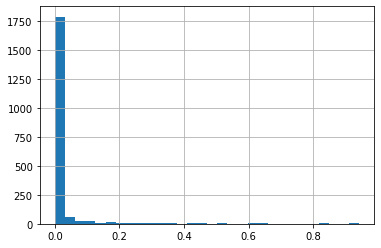

In [8]:
dynamic.get_concentration(1.0, 0.0) # adds conc column etc.
dynamic.puffs.concentration.hist(bins=30)

<AxesSubplot:>

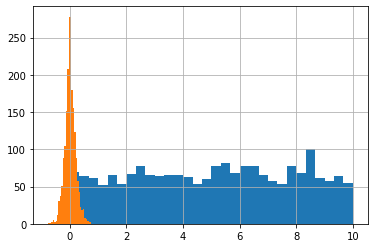

In [9]:
# dynamic.puffs.radius.hist(bins=30)
dynamic.puffs.x.hist(bins=30)
dynamic.puffs.y.hist(bins=30)

In [10]:
print(dynamic.puffs.shape)
dynamic.puffs.head()

(1988, 11)


,puff_number,time,tidx,x,y,radius,x_minus_radius,x_plus_radius,y_minus_radius,y_plus_radius,concentration
1835,3015,50.53,5056,9.996,-0.023915,0.2116,9.7844,10.2076,-0.235515,0.187685,0.000106
1836,3016,50.53,5056,9.991,-0.002355,0.2115,9.7795,10.2025,-0.213855,0.209145,0.000106
1837,3017,50.53,5056,9.991,0.185723,0.2115,9.7795,10.2025,-0.025777,0.397223,0.000106
1838,3018,50.53,5056,9.986,-0.077873,0.2114,9.7746,10.1974,-0.289273,0.133527,0.000106
1839,3019,50.53,5056,9.981,0.150807,0.2113,9.7697,10.1923,-0.060493,0.362107,0.000106


In [11]:
# Format for plot_puffs_and_wind_vectors()
t_val = dynamic.tidx/100
dynamic.puffs.time = t_val # TODO: Fix time ≠ tidx/100
data_wind = pd.DataFrame([{'wind_x': dynamic.wind[0], 
                       'wind_y': dynamic.wind[1], 
                       'tidx': dynamic.tidx,
                       'time': dynamic.tidx/100}])

data_puffs = dynamic.puffs
data_wind.time == t_val
data_wind[data_wind.time == t_val]

,wind_x,wind_y,tidx,time
0,0.5,0.0,5056,50.56


1.0

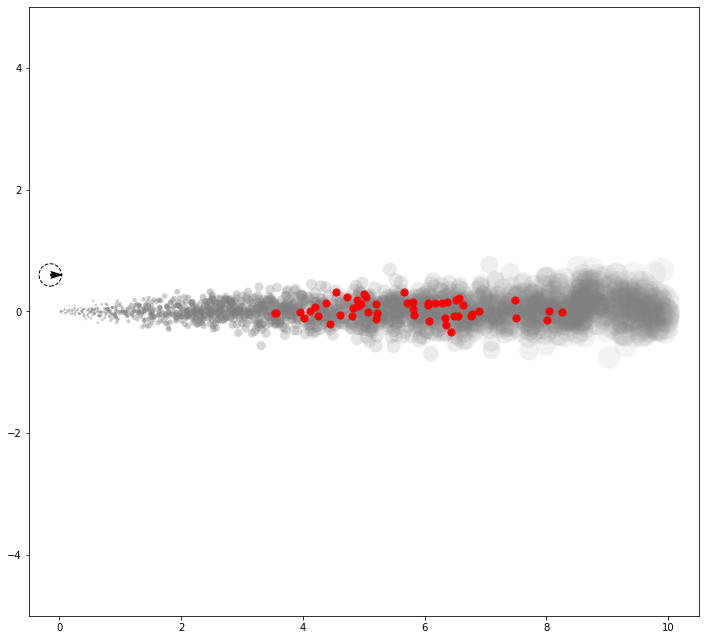

In [12]:
# t_val = min(60, t_val -1)
fname = ''
plotsize=(12,12) # this needs to be bigger than what comes out!
fig, ax = plume_analysis.plot_puffs_and_wind_vectors(data_puffs, data_wind, t_val, 
                                           fname=fname, plotsize=plotsize)

ax.set_xlim(-0.5, 10.5)
# ax.set_ylim(-1.5, +1.5)
ax.set_ylim(-5, +5) # if switching

for i in range(50):
    loc_xy = dynamic.get_initial_location(None)
    plt.scatter(loc_xy[0], loc_xy[1], s=50, c='r')

dynamic.birthx_ep

# What is true extent of plume?

In [13]:
xmin = -0.5
xmax = 10.0
ymin = -1.2
ymax = +1.2
# SLOW!!
# x = np.linspace(xmin, xmax, 40)
# y = np.linspace(ymin, ymax, 30)

# QUICK
x = np.linspace(xmin, xmax, 10)
y = np.linspace(ymin, ymax, 10)

# xgrid, ygrid = np.meshgrid(x, y)
# xgrid.shape, ygrid.shape
grid_xy = np.meshgrid(x, y)
grid = np.array(grid_xy)
grid.shape

(2, 10, 10)

In [14]:
data_puffs_t = data_puffs[data_puffs.time == t_val]
getOdor = lambda x : dynamic.get_concentration(x[0], x[1])
getOdor([0.2, 0.0])
# %timeit getOdor([0.2, 0.0]) # 5.44 ms ± 826 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

0.7136803224848525

In [15]:
odorMap = np.apply_along_axis(getOdor, 0, grid) # 2 sec for 10x10
odorMap.shape

(10, 10)

In [16]:
odorMap[odorMap < config.env['odor_threshold']] = 0.0

<AxesSubplot:>

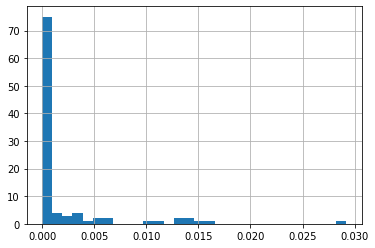

In [17]:
pd.Series(odorMap.flatten()).hist(bins=30)

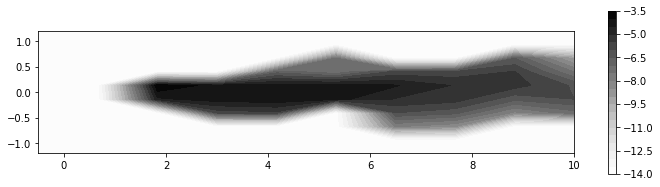

In [18]:
fig = plt.figure(figsize=(12, 3))
color_levels = 20 # grainier when lower (might look better!)
plt.contourf(grid[0,:,:], grid[1,:,:], 
             np.log(odorMap + 1e-6),
             color_levels, 
             cmap='Greys')
plt.colorbar();
ax = plt.gca()
ax.set_aspect('equal')

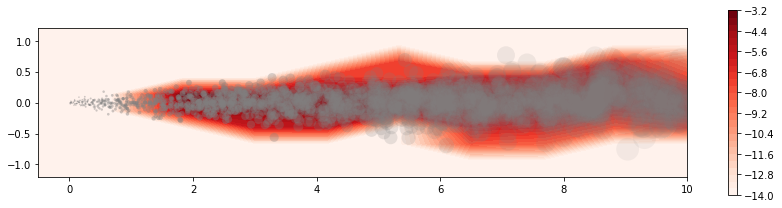

In [19]:
fig = plt.figure(figsize=(12, 3))
plt.contourf(grid[0,:,:], grid[1,:,:], np.log(odorMap + 1e-6), 30, cmap='Reds')
plt.colorbar();
ax = plt.gca()
ax.set_aspect('equal')
plt.tight_layout();

sim_analysis.plot_puffs(data_puffs, t_val, ax)

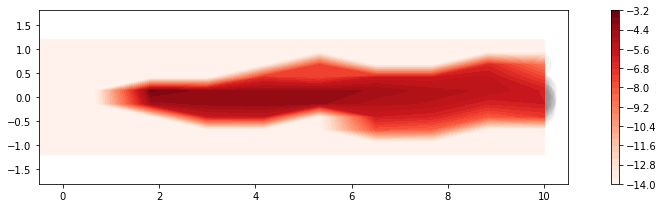

In [20]:

fname = ''
plotsize=(12,3) # this needs to be bigger than what comes out!
fig, ax = plume_analysis.plot_puffs_and_wind_vectors(data_puffs, data_wind, t_val, 
                                           fname=fname, plotsize=plotsize)

ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-1.8, +1.8)

plt.contourf(grid[0,:,:], grid[1,:,:], np.log(odorMap + 1e-6), 30, cmap='Reds')
plt.colorbar();
plt.tight_layout();

